In [ ]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
# Import the train_test_learn module
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os

files = os.listdir('.')
print(files)

['.config', 'Cleaned_data.csv', 'sample_data']


In [ ]:
import pandas as pd
from pathlib import Path

# Read the CSV file from the current directory into a Pandas DataFrame
data = Path('Cleaned_data.csv')
df = pd.read_csv(data)

# Review the DataFrame (displayed both head and tail to see if 'loan_status' has both 0's and 1's)
display(df.head())
display(df.tail())


,Unnamed: 0,Marital status,Course,Daytime/evening attendance,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Gender,Scholarship holder,Age at enrollment,Target
0,0,1,2,1,1,13,10,6,10,1,0,20,Dropout
1,1,1,11,1,1,1,3,4,4,1,0,19,Graduate
2,2,1,5,1,1,22,27,10,10,1,0,19,Dropout
3,3,1,15,1,1,23,27,6,4,0,0,20,Graduate
4,4,2,3,0,1,22,28,10,10,0,0,45,Graduate


,Unnamed: 0,Marital status,Course,Daytime/evening attendance,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Gender,Scholarship holder,Age at enrollment,Target
4419,4419,1,15,1,1,1,1,6,5,1,0,19,Graduate
4420,4420,1,15,1,19,1,1,10,10,0,0,18,Dropout
4421,4421,1,12,1,1,22,27,10,10,0,1,30,Dropout
4422,4422,1,9,1,1,22,27,8,5,0,1,20,Graduate
4423,4423,1,15,1,9,23,27,6,10,0,0,22,Graduate


In [ ]:
# Convert categorical data to numeric with `pd.get_dummies`
dummies_df = pd.get_dummies(df)
display(df.head())
display(df.tail())

,Unnamed: 0,Marital status,Course,Daytime/evening attendance,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Gender,Scholarship holder,Age at enrollment,Target
0,0,1,2,1,1,13,10,6,10,1,0,20,Dropout
1,1,1,11,1,1,1,3,4,4,1,0,19,Graduate
2,2,1,5,1,1,22,27,10,10,1,0,19,Dropout
3,3,1,15,1,1,23,27,6,4,0,0,20,Graduate
4,4,2,3,0,1,22,28,10,10,0,0,45,Graduate


,Unnamed: 0,Marital status,Course,Daytime/evening attendance,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Gender,Scholarship holder,Age at enrollment,Target
4419,4419,1,15,1,1,1,1,6,5,1,0,19,Graduate
4420,4420,1,15,1,19,1,1,10,10,0,0,18,Dropout
4421,4421,1,12,1,1,22,27,10,10,0,1,30,Dropout
4422,4422,1,9,1,1,22,27,8,5,0,1,20,Graduate
4423,4423,1,15,1,9,23,27,6,10,0,0,22,Graduate


In [ ]:
# Determine the number of unique values in each column.
df.nunique()

Unnamed: 0                    4424
Marital status                   6
Course                          17
Daytime/evening attendance       2
Nacionality                     21
Mother's qualification          29
Father's qualification          34
Mother's occupation             32
Father's occupation             46
Gender                           2
Scholarship holder               2
Age at enrollment               46
Target                           3
dtype: int64

In [ ]:
type_counts = df['Target'].value_counts()
type_counts

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

In [ ]:
# Convert Yes to 1 and No to 0
df['Target'] = df['Target'].map({'Graduate': 0, 'Dropout': 1, 'Enrolled': 2 })
df.head()

,Unnamed: 0,Marital status,Course,Daytime/evening attendance,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Gender,Scholarship holder,Age at enrollment,Target
0,0,1,2,1,1,13,10,6,10,1,0,20,1
1,1,1,11,1,1,1,3,4,4,1,0,19,0
2,2,1,5,1,1,22,27,10,10,1,0,19,1
3,3,1,15,1,1,23,27,6,4,0,0,20,0
4,4,2,3,0,1,22,28,10,10,0,0,45,0


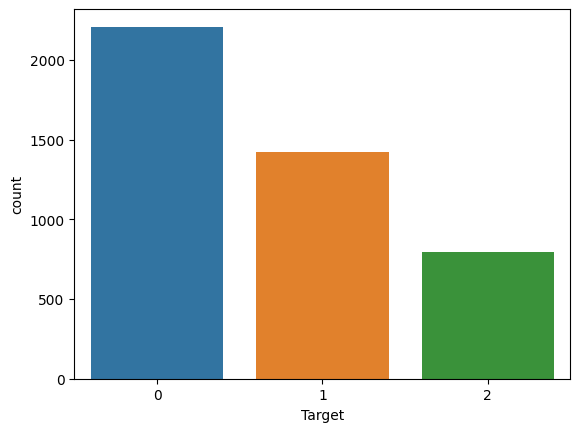

In [ ]:
# Visualize the data
sns.countplot(x ='Target', data=df)
plt.show()

In [ ]:
# Separate the data into labels and features
# Separate the y variable, the labels
y = df['Target']

# Separate the X variable, the features
X = df.drop(columns=['Target'])

In [ ]:
# Review the y variable Series
y[:5]

0    1
1    0
2    1
3    0
4    0
Name: Target, dtype: int64

In [ ]:
# Review the X variable DataFrame
X.head()

,Unnamed: 0,Marital status,Course,Daytime/evening attendance,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Gender,Scholarship holder,Age at enrollment
0,0,1,2,1,1,13,10,6,10,1,0,20
1,1,1,11,1,1,1,3,4,4,1,0,19
2,2,1,5,1,1,22,27,10,10,1,0,19
3,3,1,15,1,1,23,27,6,4,0,0,20
4,4,2,3,0,1,22,28,10,10,0,0,45


In [ ]:
# Check the balance of our target values
y.value_counts()

0    2209
1    1421
2     794
Name: Target, dtype: int64

In [ ]:
# Split the data using train_test_split
# Assign a random_state of 1 to the function
# Add 'stratify=y' so we have an even distribution of 1's and 0's within our model, so we have a representation of all of our data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=.2,
                                                    random_state=1,
                                                    )

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 4.3 MB/s eta 0:00:00


In [ ]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model4 = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid','elu','selu','softmax'])

    # Allow kerastuner to decide number of neurons in first layer
    nn_model4.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=10,
        step=2), activation=activation, input_dim=12))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model4.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=10,
            step=2),
            activation=activation))

    nn_model4.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model4.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])


    return nn_model4

In [ ]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=100,
    hyperband_iterations=2)

In [ ]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))


Trial 508 Complete [00h 00m 37s]
val_accuracy: 0.501694917678833

Best val_accuracy So Far: 0.5593220591545105
Total elapsed time: 00h 56m 39s


In [ ]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'elu',
 'first_units': 9,
 'num_layers': 5,
 'units_0': 7,
 'units_1': 1,
 'units_2': 7,
 'units_3': 7,
 'units_4': 9,
 'units_5': 9,
 'tuner/epochs': 100,
 'tuner/initial_epoch': 34,
 'tuner/bracket': 1,
 'tuner/round': 1,
 'tuner/trial_id': '0494'}

In [ ]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

28/28 - 1s - loss: 1.8182 - accuracy: 0.5593 - 892ms/epoch - 32ms/step
Loss: 1.8181723356246948, Accuracy: 0.5593220591545105
